# Sets of Linear Equations


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Angle between two vectors

We actually have two formulas yielding the result of a scalar (dot) product between two vectors:

$$s = \vec a \cdot \vec b = |\vec a|.|\vec b|.\cos{\theta}$$

$$s = \sum_{i}{a_i.b_i}$$

Equating both sides and isolating the $\cos$ gives us:

$$\cos\theta = \frac{\sum_{i}{a_i.b_i}}{|\vec a|.|\vec b|}$$

We also know from the Pythogorean theorem that the length of a vector is equal to the square root of the sum of the squares of its components:

$$|\vec a| = \sqrt{a_1^2+a_2^2+\dots+a_n^2}$$

we can rewrite this as:

$$|\vec a| = \sqrt{\sum_{i}{a_i.a_i}}$$

and the summation term looks suspiciously like the dot product! 

Hence:

$$|\vec a| = \sqrt{\vec a \cdot \vec a}$$

and our $\cos\theta$ formula becomes:

$$\cos\theta = \frac{\vec a \cdot \vec b}{\sqrt{\vec a \cdot \vec a}\sqrt{\vec b \cdot \vec b}}$$

$$\theta = \cos^{-1}{\frac{\vec a \cdot \vec b}{\sqrt{\vec a \cdot \vec a}\sqrt{\vec b \cdot \vec b}}}$$

Let's put  it in action to calculate the angle between the $\vec a = \begin{bmatrix}1\\0\end{bmatrix}$ and $\vec b = \begin{bmatrix}0\\1\end{bmatrix}$ vectors:

In [2]:
a = np.array([1,0])
b = np.array([0,1])
print(a)
print(b)

[1 0]
[0 1]


In [3]:
ab = a@b
a_norm = np.sqrt(a@a)
b_norm = np.linalg.norm(b) # alternative, optimized method
theta = np.acos(ab/(a_norm*b_norm))
print(theta)

1.5707963267948966


Does this look 90<sup>o</sup> to you? It should.. 8) Let's check the numerical value of $\tfrac{\pi}{2}$:

In [4]:
np.pi / 2

1.5707963267948966

So, we always deal in radians in mathematics! Let's convert our result to degrees:

In [5]:
theta_in_deg = np.rad2deg(theta)
print(theta_in_deg)

90.0


**Exercise/HW**  
Construct the matrix representation for the 30<sup>o</sup> ccw rotation operation.

## Sets of Linear Equations

$$ \begin{align}3x + 4y &= 5\\-2x+y &= 3\end{align} $$

### Gaussian Elimination
Gaussian Elimination method works by isolating an unknown in one equation, hence defining it in terms of the other unknowns, followed by the substitution of it into the other equations, thereby having reduced the number of unknowns by 1. Here is how it works for our set of equations:

$$ \begin{align}3x + 4y &= 5 \Rightarrow y = \frac{5 - 3x}{4}\\-2x+y &= 3\end{align} $$

Substituting $ y = \frac{5 - 3x}{4}$ into the 2nd equation for $y$ we solve for $x$:

$$\begin{align}-2x+y = 3\rightarrow -2x + \left(\frac{5 - 3x}{4}\right) &= 3\\
-2x+\frac{5}{4}-\frac{3}{4}x &=3\\
\frac{11}{4}x &= -\frac{7}{4}\\
x&=-\frac{7}{11} = -0.6363\dots
\end{align}$$

Now that we have $x$, we can calculate $y$:

$$y = \frac{5 - 3x}{4} = \frac{5 - 3\left(-\frac{7}{11}\right)}{4} =\frac{19}{11}=1.7272\dots$$

### Geometrical Interpretation
We can also follow the footsteps of the Ancient Greek philosophers and mathematicians and solve the equation set geometrically, interpreting it as the intersection of two lines:

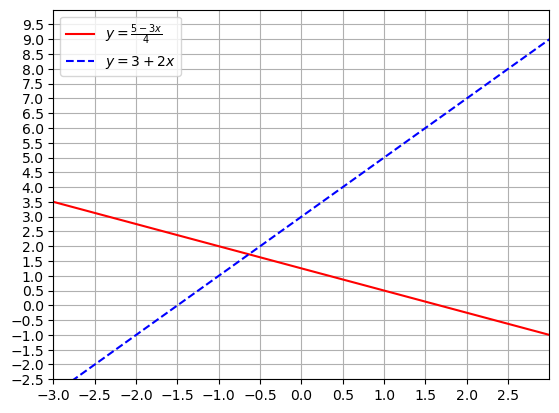

In [2]:
x = np.linspace(-3,3,30)
y1 = (5 - 3*x)/4
y2 = 3 + 2*x

plt.plot(x,y1,"r-")
plt.plot(x,y2,"b--")
plt.xticks(np.arange(-3,3,0.5))
plt.yticks(np.arange(-2.5,10,0.5))
plt.xlim(-3,3)
plt.ylim(-2.5,10)
plt.legend([r"$y = \frac{5-3x}{4}$",r"$y=3+2x$"])
plt.grid()
plt.show()

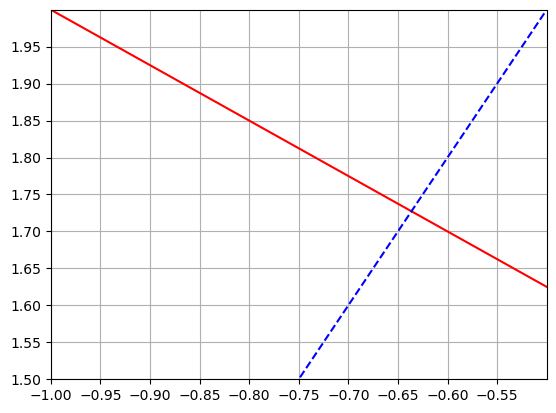

In [7]:
xmin = -1
xmax = -0.5
ymin = 1.5
ymax = 2.
xstep = (xmax-xmin)/10.
ystep = (ymax-ymin)/10.

plt.plot(x,y1,"r-")
plt.plot(x,y2,"b--")
plt.xticks(np.arange(xmin,xmax,xstep))
plt.yticks(np.arange(ymin,ymax,ystep))
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.legend([r"$y = \frac{5-3x}{4}$",r"$y=3+2x$"])
plt.grid()
plt.show()

### Matrix Interpretation

$$\begin{bmatrix}3&4\\-2&1\end{bmatrix}\begin{bmatrix}x\\y\end{bmatrix} = \begin{bmatrix}5\\3\end{bmatrix}$$

In [8]:
A = np.array([[3,4],[-2,1]])
b = np.array([[5],[3]])

x = np.linalg.solve(A,b)
print(x)

[[-0.63636364]
 [ 1.72727273]]


In [9]:
Ainv = np.linalg.inv(A)
print(Ainv)

[[ 0.09090909 -0.36363636]
 [ 0.18181818  0.27272727]]


In [10]:
Ainv@b

array([[-0.63636364],
       [ 1.72727273]])